In [3]:
from sklearn.svm import SVC #向量分类
from sklearn.datasets import fetch_lfw_people #数据集
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV #帮助选择最优算法，调节参数
from sklearn.decomposition import PCA #对数据降维处理
import logging
import matplotlib.pyplot as plt
%matplotlib inline

logging.basicConfig(level=logging.INFO)
data = fetch_lfw_people(min_faces_per_person=70,
                        resize=1,
                        slice_=(slice(0,250,None),
                                slice(0,250,None)))

In [4]:
data
# plt.imshow(data[10], cmap="gray")

{'DESCR': 'LFW faces dataset',
 'data': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [1.3333334, 1.3333334, 1.3333334, ..., 0.       , 0.       ,
         0.       ],
        [2.3333333, 2.3333333, 1.6666666, ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.6666667, 0.6666667, 0.6666667, ..., 0.6666667, 0.6666667,
         0.6666667],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 'images': array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [  1.        ,   1.        ,

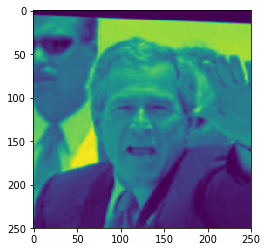

In [5]:
plt.imshow(data.images[10])

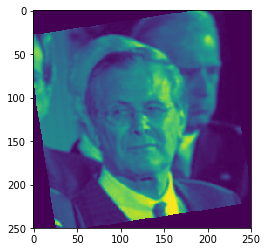

In [6]:
plt.imshow(data.images[11])

In [7]:
data.images[10]

array([[ 1.6666666 ,  1.6666666 ,  1.6666666 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333334,  0.33333334,  0.33333334, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [61.333332  , 32.333332  , 15.        , ..., 11.        ,
        11.        , 11.        ],
       [76.666664  , 34.333332  , 15.        , ..., 11.        ,
        11.        , 11.        ],
       [78.666664  , 36.333332  , 16.        , ..., 11.        ,
        11.        , 11.        ]], dtype=float32)

In [8]:
len(data.images)

1288

In [9]:
images = data.images #1288张图片
target_name = data.target_names #图片人名
target_name

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [10]:
x = data.data
x

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.3333334, 1.3333334, 1.3333334, ..., 0.       , 0.       ,
        0.       ],
       [2.3333333, 2.3333333, 1.6666666, ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.6666667, 0.6666667, 0.6666667, ..., 0.6666667, 0.6666667,
        0.6666667],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [11]:
x.shape

(1288, 62500)

In [12]:
y = data.target
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [13]:
y.shape

(1288,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.12) #数据切割0.88用于训练，0.12用于测试

In [15]:
import time
start = time.time() #开始时间
svc = SVC() #SVM分类
svc.fit(x_train, y_train) #训练
score = svc.score(x_test, y_test) #测试得分，0.4不理想
print(score)
end = time.time() #结束时加
print(end-start) #时间差

0.4064516129032258
340.46345233917236


In [16]:
end

1551105245.530236

In [18]:
new_svc = SVC()
new_svc.fit(x_train, y_train) #新的SVC，训练之
pca = PCA(n_components=150, #主成分
          svd_solver="randomized", #打乱
          whiten=True) #白化
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [19]:
print(type(pca))

<class 'sklearn.decomposition.pca.PCA'>


In [20]:
x_train_pca = pca.transform(x_train) #预处理xtrain

In [21]:
x_train.shape

(1133, 62500)

In [22]:
x_train_pca.shape

(1133, 150)

In [23]:
x_test_pca = pca.transform(x_test) #预处理x_test

In [24]:
new_svc.score(x_test, y_test)

0.4064516129032258

In [25]:
svc_best = SVC()
svc_best.fit(x_train_pca, y_train)
svc_best.score(x_test_pca, y_test)

0.6838709677419355

In [26]:
g_svc = SVC() #自动调优
param_grid = {"C":[0.2, 0.5, 0.8, 1, 3, 5, 7, 9],
              "gamma":[0.001, 0.002, 0.0033, 0.0066, 0.01, 0.03, 0.05, 0.1]} #参数，用于调优，选择一个最好的比例


In [27]:
gcv = GridSearchCV(g_svc, param_grid=param_grid) #创建一个自动调优
gcv.fit(x_train_pca, y_train) #训练

OK


In [28]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [29]:
svc_last = SVC(C=1.0, gamma=0.001)
svc_last

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
svc_last.fit(x_train, y_train)
svc_last.fit(x_train_pca, y_train) #训练数据

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
svc_last_2 = SVC(C=5.0, gamma=0.001)
svc_last_2.fit(x_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
svc_last_2.score(x_test_pca, y_test) #评分

0.7741935483870968

In [37]:
x_test_pca.shape

(155, 150)

In [38]:
y_new = svc_last_2.predict(x_test_pca) #训练数据
y_new

array([1, 3, 6, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 4, 3, 0, 2, 5, 6, 1, 1, 3,
       3, 6, 3, 1, 6, 2, 1, 3, 6, 0, 6, 2, 6, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       6, 1, 3, 3, 3, 2, 4, 3, 6, 3, 3, 3, 6, 3, 1, 5, 3, 3, 6, 0, 6, 0,
       3, 1, 1, 3, 1, 3, 5, 3, 3, 6, 3, 5, 3, 1, 5, 1, 3, 3, 3, 1, 0, 3,
       4, 1, 3, 5, 3, 4, 6, 3, 0, 1, 2, 2, 3, 1, 3, 0, 3, 3, 1, 3, 3, 2,
       4, 1, 2, 2, 3, 3, 6, 3, 0, 3, 3, 3, 3, 3, 6, 3, 6, 3, 4, 3, 3, 3,
       1, 1, 5, 3, 3, 1, 3, 6, 1, 3, 3, 2, 1, 3, 3, 3, 3, 6, 2, 3, 1, 3,
       3], dtype=int64)

In [42]:
print("预测数据")
for i in y_new:
    print(target_name[i], end=" ")

预测数据
Colin Powell George W Bush Tony Blair George W Bush George W Bush George W Bush Colin Powell George W Bush George W Bush George W Bush Colin Powell George W Bush Donald Rumsfeld Gerhard Schroeder George W Bush Ariel Sharon Donald Rumsfeld Hugo Chavez Tony Blair Colin Powell Colin Powell George W Bush George W Bush Tony Blair George W Bush Colin Powell Tony Blair Donald Rumsfeld Colin Powell George W Bush Tony Blair Ariel Sharon Tony Blair Donald Rumsfeld Tony Blair George W Bush George W Bush George W Bush Donald Rumsfeld George W Bush George W Bush George W Bush George W Bush George W Bush Tony Blair Colin Powell George W Bush George W Bush George W Bush Donald Rumsfeld Gerhard Schroeder George W Bush Tony Blair George W Bush George W Bush George W Bush Tony Blair George W Bush Colin Powell Hugo Chavez George W Bush George W Bush Tony Blair Ariel Sharon Tony Blair Ariel Sharon George W Bush Colin Powell Colin Powell George W Bush Colin Powell George W Bush Hugo Chavez George W Bu

In [43]:
print("真实数据")
for i in y_test:
    print(target_name[i], end=" ")

真实数据
Colin Powell George W Bush Ariel Sharon Tony Blair George W Bush George W Bush Colin Powell Tony Blair George W Bush Ariel Sharon Colin Powell Donald Rumsfeld Donald Rumsfeld Gerhard Schroeder George W Bush Ariel Sharon Tony Blair Gerhard Schroeder Tony Blair George W Bush Colin Powell George W Bush George W Bush Tony Blair Tony Blair Colin Powell Tony Blair Donald Rumsfeld Colin Powell George W Bush Tony Blair Ariel Sharon Tony Blair Donald Rumsfeld George W Bush George W Bush George W Bush George W Bush Gerhard Schroeder George W Bush George W Bush George W Bush George W Bush George W Bush Colin Powell Colin Powell George W Bush George W Bush George W Bush Donald Rumsfeld Gerhard Schroeder George W Bush Tony Blair Colin Powell George W Bush Ariel Sharon Gerhard Schroeder Donald Rumsfeld Colin Powell Gerhard Schroeder Hugo Chavez George W Bush Tony Blair Ariel Sharon Tony Blair Ariel Sharon Colin Powell Colin Powell Colin Powell Hugo Chavez Colin Powell George W Bush Hugo Chavez 

In [44]:
y_last = svc_last_2.predict(x_test_pca[:20])
print(y_last)
print(len(y_last))
print(y_test[:20])

[1 3 6 3 3 3 1 3 3 3 1 3 2 4 3 0 2 5 6 1]
20
[1 3 0 6 3 3 1 6 3 0 1 2 2 4 3 0 6 4 6 3]


In [46]:
def get_names(y_last, y_test, target_name, i):
    predictname = target_name[y_last[i]].rsplit(" ")[-1]
    truename = target_name[y_test[i]].rsplit(" ")[-1]
    return "predict:%s \n true: %s" %(predictname, truename) #测试名字
get_names(y_last, y_test, target_name, 3)

'predict:Bush \n true: Blair'

In [47]:
names = [get_names(y_last, y_test, target_name, i) for i in range(20)]
names

['predict:Powell \n true: Powell',
 'predict:Bush \n true: Bush',
 'predict:Blair \n true: Sharon',
 'predict:Bush \n true: Blair',
 'predict:Bush \n true: Bush',
 'predict:Bush \n true: Bush',
 'predict:Powell \n true: Powell',
 'predict:Bush \n true: Blair',
 'predict:Bush \n true: Bush',
 'predict:Bush \n true: Sharon',
 'predict:Powell \n true: Powell',
 'predict:Bush \n true: Rumsfeld',
 'predict:Rumsfeld \n true: Rumsfeld',
 'predict:Schroeder \n true: Schroeder',
 'predict:Bush \n true: Bush',
 'predict:Sharon \n true: Sharon',
 'predict:Rumsfeld \n true: Blair',
 'predict:Chavez \n true: Schroeder',
 'predict:Blair \n true: Blair',
 'predict:Powell \n true: Bush']

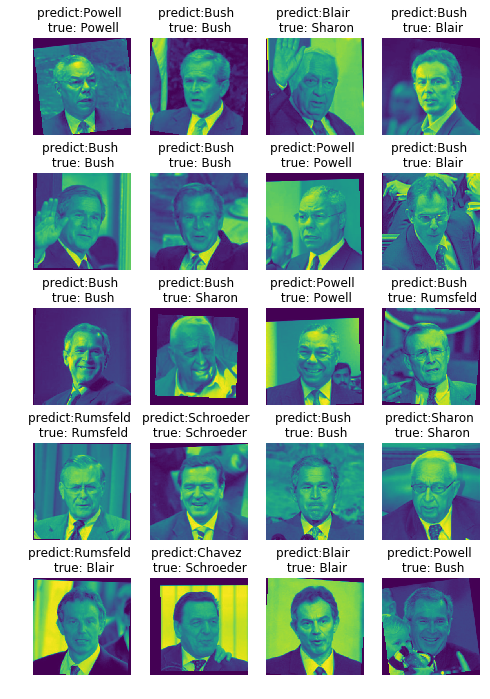

In [49]:
def show_predict_result(names, row, columns, x_test): #批量绘图
    plt.figure(figsize=(columns*2, row*2.4)) #设置图片大小
    for i, image in enumerate(x_test): #循环索引，图片数组
        plt.subplot(row, columns, (i+1)) #增加一张子图
        plt.imshow(image.reshape((250,250))) #调整形状
        plt.axis("off")
        plt.title(names[i]) #设置标题
show_predict_result(names, 5, 4, x_test[:20])

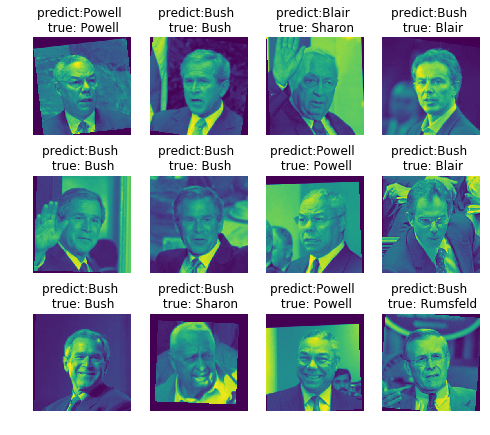

In [52]:
show_predict_result(names, 3, 4, x_test[:12])